# Importar librerias y el dataset



In [1]:
pip install -r req.txt

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy import genfromtxt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
#from google.colab import files
import io
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import tensorflow as tf
from tensorflow.keras import optimizers

from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

#Funciones adicionales

##Plot confusion matrix multi label

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_xlabel('Predicted label')
    axes.set_ylabel('True label')
    axes.set_title("CM for the class - " + class_label)

In [4]:
#Test
y_b =  [1,1,4,1,1,1]
y_b2 = [1,1,3,5,5,5]

In [5]:
def graficar_multi(cm,class_names):
    fig, ax = plt.subplots(4, 3, figsize=(12, 7))

    for axes, cfs_matrix, label in zip(ax.flatten(), cm, class_names):
      print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
        
    fig.tight_layout()
    plt.show()

# Importacion de los dataset y muestra de los datos

## Importamos el dataset de la libreria de keras para poder realizar su visualizacion 

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

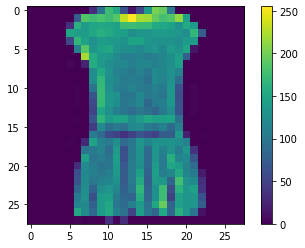

In [7]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
class_names = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botines']

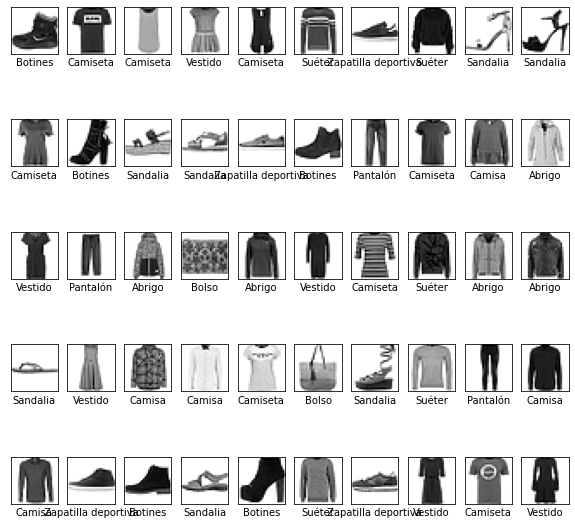

In [9]:
plt.figure(figsize=(10,10))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
train_images = train_images / 255

In [11]:
test_images = test_images / 255

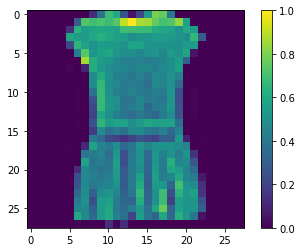

In [12]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

## Importamos el data set desde los archivos .csv para el entrenamiento del modelo

### Importamos el conjunto de datos de entrenamieto

In [13]:
my_data_1 = genfromtxt('fashion-mnist_train.csv', delimiter=',')

In [14]:
my_data_1 = np.delete(my_data_1, 0, 0)

In [15]:
my_data_1

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]])

In [16]:
X_train = np.delete(my_data_1, 0, 1)
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
y = my_data_1[:,0]
y

array([2., 9., 6., ..., 8., 8., 7.])

In [18]:
y_train = keras.utils.to_categorical(y,num_classes=10)
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [19]:
X_train.shape

(60000, 784)

In [20]:
y_train.shape

(60000, 10)

### Importamos el conjunto de datos de prueba

In [21]:
my_data_2 = genfromtxt('fashion-mnist_test.csv', delimiter=',')

In [22]:
my_data_2 = np.delete(my_data_2, 0, 0)

In [23]:
my_data_2

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [24]:
X_test = np.delete(my_data_2, 0, 1)
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 3., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
y_2 = my_data_2[:,0]
y_2

array([0., 1., 2., ..., 8., 8., 1.])

In [26]:
y_test = keras.utils.to_categorical(y_2,num_classes=10)
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
X_test.shape

(10000, 784)

In [28]:
y_test.shape

(10000, 10)

## Modelo inicial

## Modelos SKlearn

### 1.Probando una clasificador con Navie bayes MultinomialNB

#### Entrenamiento

In [29]:
clf = MultinomialNB()

In [30]:
clf.fit(X_train, y)

MultinomialNB()

#### Resultados

In [31]:
y_naive_bayes = clf.predict(X_train)
y_naive_bayes_test = clf.predict(X_test)

In [32]:
clf.score(X_train, y)

0.6653333333333333

In [33]:
clf.score(X_test, y_2)

0.6674

In [34]:
print('Naive Bayes\n\nTrain:\n')
print('Orden de las etiquetas: \n{}'.format(class_names))
print('Precision por clase: \n{}'.format(precision_score(y, y_naive_bayes, average=None)))
print('Precisión micro: \n{}'.format(precision_score(y, y_naive_bayes, average='micro')))
print('Precisión macro: \n{}'.format(precision_score(y, y_naive_bayes, average='macro')))
print('Precisión pesada: \n{}'.format(precision_score(y, y_naive_bayes, average='weighted')))
print('\n\nTest:\n')
print('Orden de las etiquetas: \n{}'.format(class_names))
print('Precision por clase: \n{}'.format(precision_score(y_2, y_naive_bayes_test, average=None)))
print('Precisión micro: \n{}'.format(precision_score(y_2, y_naive_bayes_test, average='micro')))
print('Precisión macro: \n{}'.format(precision_score(y_2, y_naive_bayes_test, average='macro')))
print('Precisión pesada: \n{}'.format(precision_score(y_2, y_naive_bayes_test, average='weighted')))

Naive Bayes

Train:

Orden de las etiquetas: 
['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botines']
Precision por clase: 
[0.73621252 0.98050037 0.6224794  0.65457921 0.46304935 0.66151582
 0.33917309 0.59234162 0.88755459 0.69354839]
Precisión micro: 
0.6653333333333333
Precisión macro: 
0.663095434206207
Precisión pesada: 
0.663095434206207


Test:

Orden de las etiquetas: 
['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botines']
Precision por clase: 
[0.73759542 0.97408207 0.62603306 0.65860806 0.46656649 0.70562771
 0.32599119 0.58712614 0.88677249 0.68760469]
Precisión micro: 
0.6674
Precisión macro: 
0.6656007310886742
Precisión pesada: 
0.6656007310886742


In [35]:
print('Naive Bayes\n\nTrain:\n')
print(classification_report(y, y_naive_bayes))
print('\n\nTest:\n')
print(classification_report(y_2, y_naive_bayes_test))

Naive Bayes

Train:

              precision    recall  f1-score   support

         0.0       0.74      0.79      0.76      6000
         1.0       0.98      0.89      0.93      6000
         2.0       0.62      0.59      0.61      6000
         3.0       0.65      0.88      0.75      6000
         4.0       0.46      0.63      0.53      6000
         5.0       0.66      0.15      0.24      6000
         6.0       0.34      0.16      0.22      6000
         7.0       0.59      0.92      0.72      6000
         8.0       0.89      0.81      0.85      6000
         9.0       0.69      0.83      0.76      6000

    accuracy                           0.67     60000
   macro avg       0.66      0.67      0.64     60000
weighted avg       0.66      0.67      0.64     60000



Test:

              precision    recall  f1-score   support

         0.0       0.74      0.77      0.75      1000
         1.0       0.97      0.90      0.94      1000
         2.0       0.63      0.61      0.62     

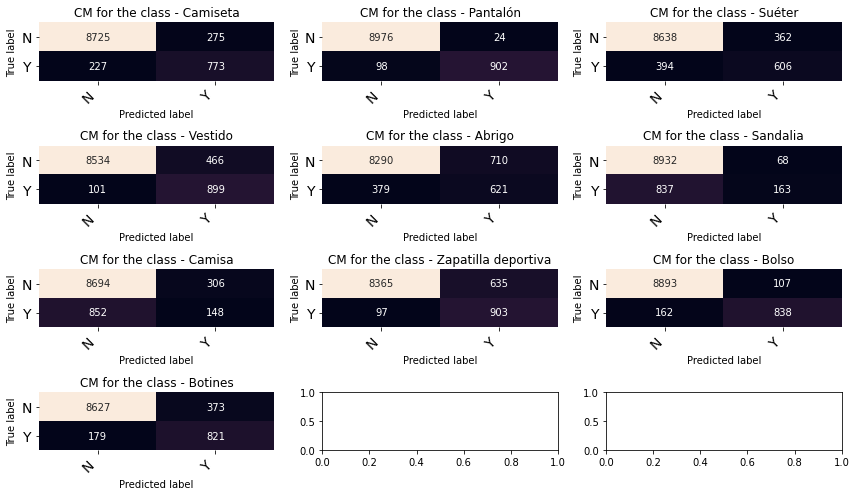

In [54]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_true=y_2.astype(int),y_pred=y_naive_bayes_test,labels=[0,1,2,3,4,5,6,7,8,9])
graficar_multi(cm,class_names)

### 2.Probando utilizando un arbol de desicion

#### Entrenando

In [36]:
dtree_model = DecisionTreeClassifier(max_depth = 10).fit(X_train, y)

In [37]:
dtree_model.score(X_train, y)

0.8479666666666666

#### Resultados

In [38]:
y_dtree_train = dtree_model.predict(X_train)
y_dtree_test = dtree_model.predict(X_test)

In [39]:
print('Arbol de decision\n\nTrain:\n')
print(classification_report(y_dtree_train,y))
print('\n\nTest:\n')
print(classification_report(y_dtree_test,y_2))

Arbol de decision

Train:

              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82      6364
         1.0       0.94      0.99      0.97      5720
         2.0       0.69      0.76      0.73      5481
         3.0       0.86      0.84      0.85      6139
         4.0       0.78      0.66      0.72      7151
         5.0       0.93      0.97      0.95      5752
         6.0       0.60      0.66      0.63      5386
         7.0       0.95      0.90      0.92      6328
         8.0       0.94      0.97      0.96      5830
         9.0       0.93      0.95      0.94      5849

    accuracy                           0.85     60000
   macro avg       0.85      0.85      0.85     60000
weighted avg       0.85      0.85      0.85     60000



Test:

              precision    recall  f1-score   support

         0.0       0.79      0.74      0.76      1067
         1.0       0.94      0.98      0.96       966
         2.0       0.67      0.74      0.7

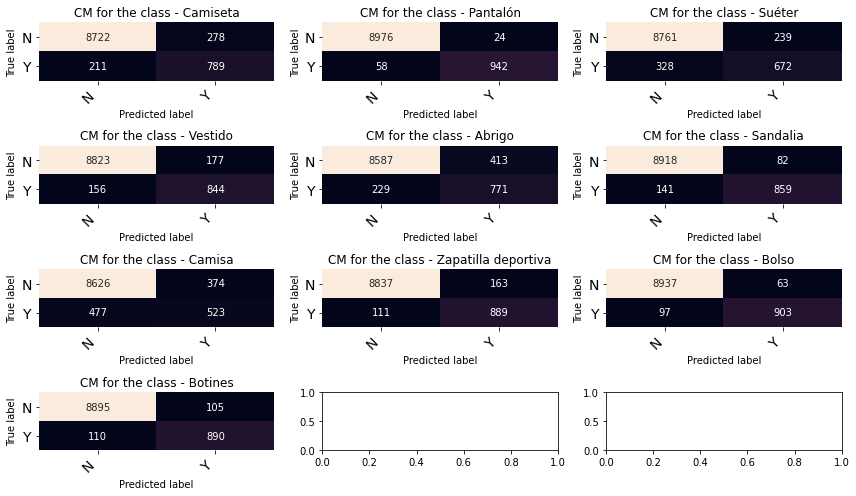

In [40]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_true=y_2.astype(int),y_pred=y_dtree_test,labels=[0,1,2,3,4,5,6,7,8,9])
graficar_multi(cm,class_names)

## 3. Red neuronal con Keras

### Entrenamineto

In [41]:
keras.backend.clear_session()
model_keras = Sequential()

In [42]:
model_keras.add(Dense(units=10,activation='relu',input_dim=784))
model_keras.add(Dense(units=10,activation='softmax'))

In [43]:
model_keras.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [44]:
model_keras.fit(X_train, y_train, epochs=25, batch_size=1024)

Epoch 1/25
59/59 [==============================] - 0s 3ms/step - loss: 6.9010 - accuracy: 0.1204
Epoch 2/25
59/59 [==============================] - 0s 3ms/step - loss: 2.3039 - accuracy: 0.1082
Epoch 3/25
59/59 [==============================] - 0s 3ms/step - loss: 2.2465 - accuracy: 0.1309
Epoch 4/25
59/59 [==============================] - 0s 3ms/step - loss: 2.2163 - accuracy: 0.1424
Epoch 5/25
59/59 [==============================] - 0s 3ms/step - loss: 2.1910 - accuracy: 0.1520
Epoch 6/25
59/59 [==============================] - 0s 3ms/step - loss: 2.1588 - accuracy: 0.1641
Epoch 7/25
59/59 [==============================] - 0s 3ms/step - loss: 2.1431 - accuracy: 0.1713
Epoch 8/25
59/59 [==============================] - 0s 3ms/step - loss: 2.1251 - accuracy: 0.1715
Epoch 9/25
59/59 [==============================] - 0s 3ms/step - loss: 2.1167 - accuracy: 0.1733
Epoch 10/25
59/59 [==============================] - 0s 3ms/step - loss: 2.1084 - accuracy: 0.1801
Epoch 11/25
59/59 [

### Resultados

In [45]:
model_keras.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [46]:
y_keras_train_one_hot = model_keras.predict(X_train)
y_keras_test_one_hot = model_keras.predict(X_test)

In [47]:
print(y[0])
print(y.shape)
print(y)
print(np.argmax(y_train,axis=1))

y_keras_train = np.argmax(y_keras_train_one_hot,axis=1)
y_keras_test = np.argmax(y_keras_test_one_hot,axis=1)

2.0
(60000,)
[2. 9. 6. ... 8. 8. 7.]
[2 9 6 ... 8 8 7]


In [48]:
print('Arbol de decision\n\nTrain:\n')
print(classification_report(y_keras_train,y,target_names=class_names))
print('\n\nTest:\n')
print(classification_report(y_keras_test,y_2,target_names=class_names))

Arbol de decision

Train:

                     precision    recall  f1-score   support

           Camiseta       1.00      0.14      0.25     42399
           Pantalón       0.00      0.00      0.00         0
             Suéter       0.00      0.00      0.00         0
            Vestido       0.00      0.00      0.00         0
             Abrigo       0.00      0.00      0.00         0
           Sandalia       0.93      0.84      0.88      6594
             Camisa       0.00      0.00      0.00         0
Zapatilla deportiva       0.79      0.84      0.81      5589
              Bolso       0.00      0.18      0.01       117
            Botines       0.78      0.89      0.83      5301

           accuracy                           0.35     60000
          macro avg       0.35      0.29      0.28     60000
       weighted avg       0.95      0.35      0.42     60000



Test:

                     precision    recall  f1-score   support

           Camiseta       1.00      0.14     

c:\users\jaime\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


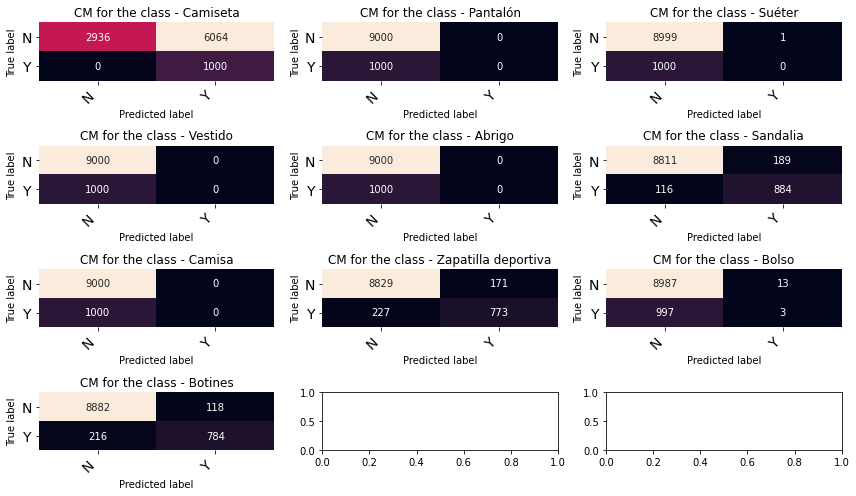

In [50]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_true=y_2.astype(int),y_pred=y_keras_test,labels=[0,1,2,3,4,5,6,7,8,9])
graficar_multi(cm,class_names)

## Evaluacion del Desempeño

probar el modelo con train


probar con test


graficar curva de error

ver bias y varianza


# Optimizacion

## Modelo con Minibatch (si se demora)

## Modelo con normalizacion

## Modelo con adam

# Iniciar busqueda de hyperparametros


## Caso bias graficar cada mierda

ver tasa de aprendizaje


numero de capas


numero nodos

## Caso varianza

Meterle mas datos

Regularizacion

#Modelo final